# Import Libraries

In [651]:
import pandas as pd # Dataframe management
import numpy as np # Arrays operations

import matplotlib as mpl # Plots
import matplotlib.pyplot as plt # Plots
import seaborn as sns # Plots

from sklearn.compose import ColumnTransformer # Transform numerical and categorical columns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder, PolynomialFeatures # Data Operators
from sklearn.pipeline import Pipeline # Create Pipeline

from sklearn.model_selection import train_test_split # Split data into train and test
from sklearn.model_selection import cross_val_score # Cross Validation

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, LogisticRegression # Supervised Models
from sklearn.svm import SVR, SVC # Support Vector
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor # Random Forest

from sklearn.feature_selection import RFECV # Recursive Feature Elimination with Cross validation
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay # Classification Metrics


mpl.style.use('ggplot') # Plot Style

# Data

In [652]:
df = pd.read_excel("grades.xlsx")
df.head()

,ID,Sex,Class,Semester,Year,Type,G1,G2,G3,FG
0,3419,M,Mechanic of Materials,5,2020,Spring,3.602917,3.58750,4.77500,4.067125
1,3418,M,Mechanic of Materials,5,2020,Spring,4.060000,3.83750,4.77500,4.279250
2,3425,M,Mechanic of Materials,5,2020,Spring,3.848688,4.03125,4.73125,4.256481
3,3463,M,Mechanic of Materials,5,2020,Spring,3.580167,3.83750,4.77500,4.135300
4,3393,F,Mechanic of Materials,5,2020,Spring,3.212292,3.10000,5.00000,3.893687


## Dataframe information

This dataset contains the grade records for several students of the Mechatronics Engineering Program from 2020 to 2023. Each semesters is splitted into three periods (G1, G3, G3). The Final Grade (FG) is calculated based on the grades from each period using the following equation:

$$ FG = 0.3G_1 + 0.3G_3 + 0.4G_3$$

The grade scale ranges from **0.00** to **5.00**. 

All classes belong to the mechanic area of the program. This Mechatronics Engineering Program lasts 10 semesters (5 years)

### Feature description

- **ID**: Student's ID, which increases according to its starting year
- **Sex**: Student's sex (M: Male, F: Female)
- **Class**: Class name
    - Material Science
    - Mechanic of Materials
    - Applied Dynamics
    - Fluid Mechanics
    - Thermofluids
    - Material Selection
    - Forensic Engineering
- **Semester**: Semester in which the class is taught
    - 3
    - 5
    - 6
    - 8
    - 9
- **Year**: Year of the record
- **Type**: Type of semester
    - Spring
    - Fall
- **G1**: Grades for the first period of the semester
- **G2**: Grades for the second period of the semester
- **G3**: Grades for the third period of the semester
- **FG**: Final Grades

In [653]:
# Datafame size

df.shape

(547, 10)

The *dataframe* has **547** strudent's grades records.

In [654]:
# Datatype info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        547 non-null    int64  
 1   Sex       547 non-null    object 
 2   Class     547 non-null    object 
 3   Semester  547 non-null    int64  
 4   Year      547 non-null    int64  
 5   Type      547 non-null    object 
 6   G1        547 non-null    float64
 7   G2        547 non-null    float64
 8   G3        547 non-null    float64
 9   FG        547 non-null    float64
dtypes: float64(4), int64(3), object(3)
memory usage: 42.9+ KB


In [655]:
# Numerical statistical information

df.describe()

,ID,Semester,Year,G1,G2,G3,FG
count,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000,547.000000
mean,3572.663620,6.080439,2021.557587,3.399708,3.237098,3.597107,3.429885
std,393.620599,1.890046,1.145893,0.749527,0.875941,1.004334,0.711118
min,1967.000000,3.000000,2020.000000,1.033333,0.000000,0.000000,0.616774
25%,3309.500000,5.000000,2021.000000,2.864826,2.627917,3.096559,3.046663
50%,3526.000000,5.000000,2022.000000,3.471764,3.292242,3.822326,3.475653
75%,3910.500000,8.000000,2023.000000,4.008271,3.914469,4.324326,3.938132
max,4296.000000,9.000000,2023.000000,4.846000,5.001000,5.092500,4.957232


In [656]:
# Categorical information

df.describe(include = "O")

,Sex,Class,Type
count,547,547,547
unique,2,7,2
top,M,Mechanic of Materials,Fall
freq,428,250,294


In [657]:
# Check for missing values

df.isna().any()

ID          False
Sex         False
Class       False
Semester    False
Year        False
Type        False
G1          False
G2          False
G3          False
FG          False
dtype: bool

# EDA

### ID Column

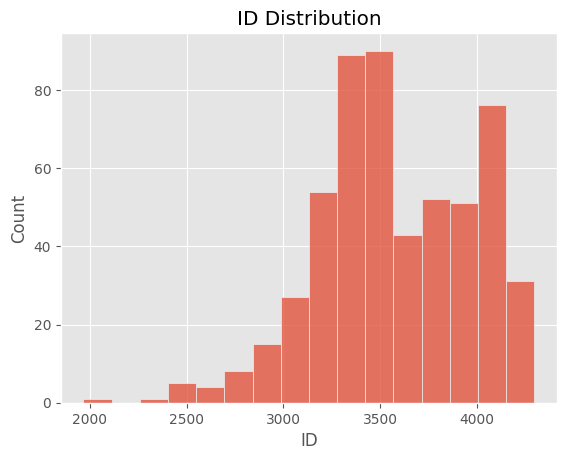

In [658]:
sns.histplot(data = df, x = "ID")
plt.title("ID Distribution")
plt.show()

The **ID** code is related to the starting year of each student. Lowest numbers belong to oldest students.

### Sex

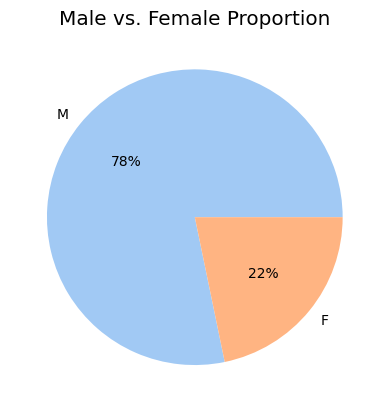

In [659]:
plt.pie(data = pd.DataFrame(df["Sex"].value_counts().reset_index()), x = "count", labels = "Sex", colors = sns.color_palette("pastel"), autopct = "%.0f%%") 
plt.title("Male vs. Female Proportion")
plt.show()

Mechatronics Engineering, akin to others engineering careers, has had a male majority. Specifically, in this program the *female:male* rate is **1:4**. 

### Class

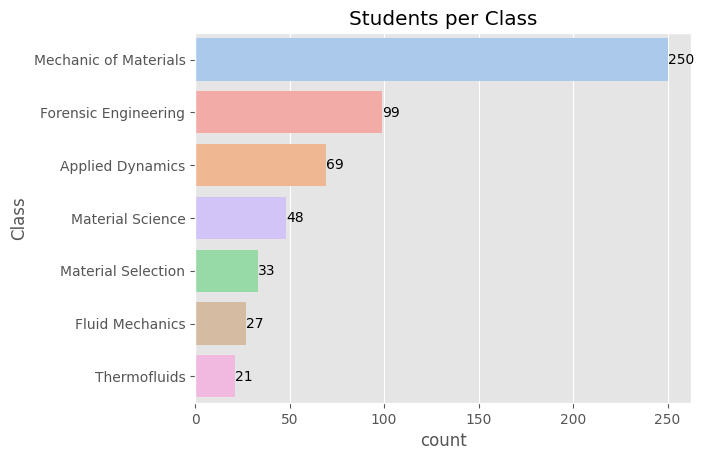

In [660]:
ax = sns.countplot(data = df, y = "Class", palette = "pastel", hue = "Class", order = df['Class'].value_counts().index)

for label in ax.containers:
    ax.bar_label(label)

plt.title("Students per Class")
plt.show()

*Mechanic of Materials* has largest number of students because it was the only permanent class in both semesters of each year from 3030 to 3033. On the other hand, *Fluid Mechanics* and *Thermofluids* have the lowest number because these classes were only taught in the last semester of 3033.

### Year

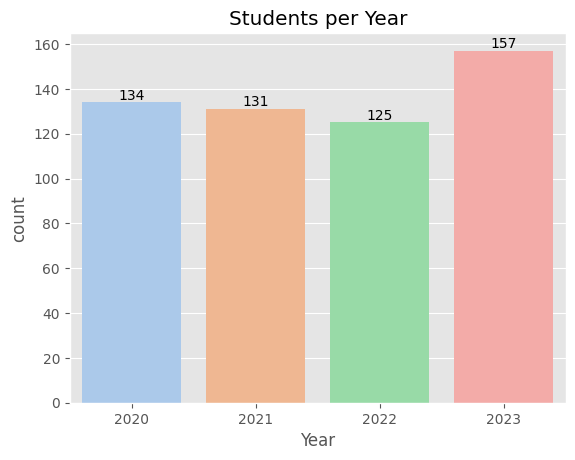

In [661]:
ax = sns.barplot(data = pd.DataFrame(df["Year"].value_counts().reset_index()), y = "count", x = "Year", palette = "pastel", hue = "Year", legend = False)

for label in ax.containers:
    ax.bar_label(label)

plt.title("Students per Year")
plt.show()

The quantity of students was consistent from 2020 to 2023, but there was an increase in 2023, possibly due to larger class sections.

### Type

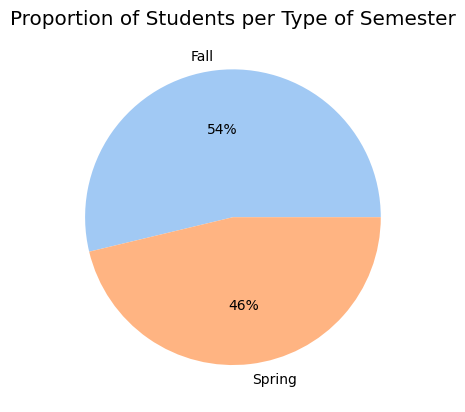

In [662]:
plt.pie(data = pd.DataFrame(df["Type"].value_counts().reset_index()), x = "count", labels = "Type", colors = sns.color_palette("pastel"), autopct = "%.0f%%") 
plt.title("Proportion of Students per Type of Semester")
plt.show()

The proportion of students in fall semesters it was a slightly higher than in the spring semesters.

### Grades

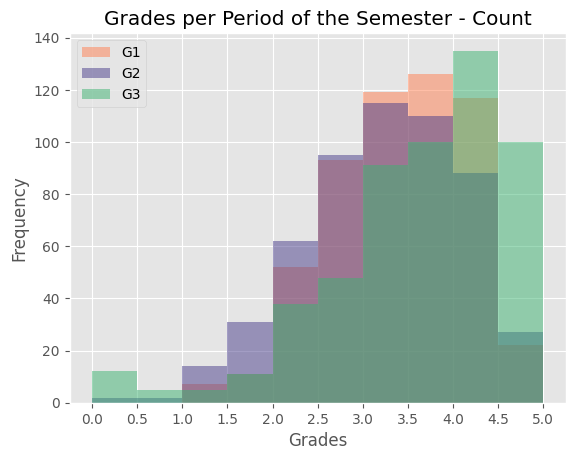

In [663]:
bins_d = np.arange(0,5.5,0.5)

df[["G1", "G2", "G3"]].plot(kind = "hist",
                            bins = bins_d,
                            xticks = bins_d, 
                            alpha = 0.5, 
                            color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.xlabel("Grades")
plt.title("Grades per Period of the Semester - Count")
plt.show()

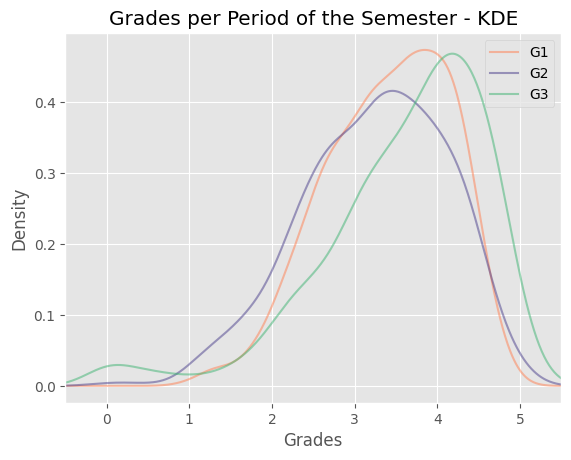

In [664]:
df[["G1", "G2", "G3"]].plot(kind = "kde", 
                            alpha = 0.5, 
                            color=['coral', 'darkslateblue', 'mediumseagreen'])

plt.xlabel("Grades")
plt.xlim([-0.5, 5.5])
plt.title("Grades per Period of the Semester - KDE")
plt.show()

The second period of the semester used to be the most demanding, for that reason the grades tend to be lower compared to the grades of the first and third periods.

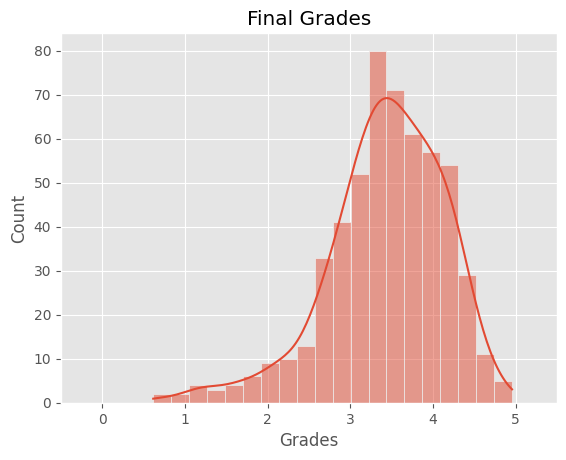

In [665]:
sns.histplot(data = df, x = "FG", kde = True)
plt.xlim([-0.5, 5.5])
plt.xlabel("Grades")
plt.title("Final Grades")
plt.show()

Most of the student approved the classes and obtained final grades between 3.00 and 4.00

### College Level

Create a column for the College Level for each class based on the credit hours:

1. **freshmen**: 0–30 hours
3. **sophomore**: 31–60 hours
3. **junior**: 61–90 hours
4. **senior**: 90+ hours

Based on credit hours, the semesters of the mechatronics engineering program are classified as follows

- Semesters 1-3: *freshman*
- Semesters 4-5: *sophomore*
- Semesters 6-8: *junior*
- Semesters 9-10: *senior*

In [666]:
df["Level"] = df["Semester"].apply(lambda x: "freshman" if x in [1, 2, 3] else ("sophomore" if x in [4, 5] else ("junior" if x in [6, 7, 8] else "senior")))
df.head()

,ID,Sex,Class,Semester,Year,Type,G1,G2,G3,FG,Level
0,3419,M,Mechanic of Materials,5,2020,Spring,3.602917,3.58750,4.77500,4.067125,sophomore
1,3418,M,Mechanic of Materials,5,2020,Spring,4.060000,3.83750,4.77500,4.279250,sophomore
2,3425,M,Mechanic of Materials,5,2020,Spring,3.848688,4.03125,4.73125,4.256481,sophomore
3,3463,M,Mechanic of Materials,5,2020,Spring,3.580167,3.83750,4.77500,4.135300,sophomore
4,3393,F,Mechanic of Materials,5,2020,Spring,3.212292,3.10000,5.00000,3.893687,sophomore


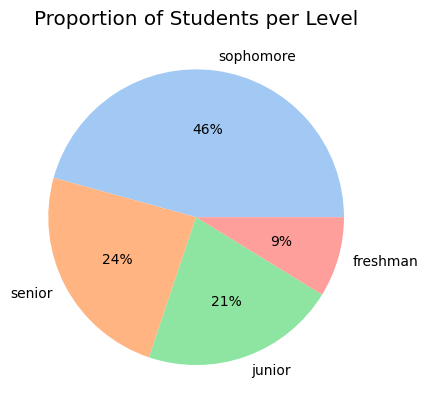

In [667]:
plt.pie(data = pd.DataFrame(df["Level"].value_counts().reset_index()), x = "count", labels = "Level", colors = sns.color_palette("pastel"), autopct = "%.0f%%") 
plt.title("Proportion of Students per Level")
plt.show()

*Shophomore* level has the biggest proportion due to the quantity of students from *Mechanic of Materials* classes.

### Pandemic

During years 2020 and 2021 the policy from College was to teach remotely due to pandemic. We returned to teaching on site in 2023.

In [668]:
df["Remote"] = df["Year"].apply(lambda x: 1 if x in [2020, 2021] else 0)
df.head()

,ID,Sex,Class,Semester,Year,Type,G1,G2,G3,FG,Level,Remote
0,3419,M,Mechanic of Materials,5,2020,Spring,3.602917,3.58750,4.77500,4.067125,sophomore,1
1,3418,M,Mechanic of Materials,5,2020,Spring,4.060000,3.83750,4.77500,4.279250,sophomore,1
2,3425,M,Mechanic of Materials,5,2020,Spring,3.848688,4.03125,4.73125,4.256481,sophomore,1
3,3463,M,Mechanic of Materials,5,2020,Spring,3.580167,3.83750,4.77500,4.135300,sophomore,1
4,3393,F,Mechanic of Materials,5,2020,Spring,3.212292,3.10000,5.00000,3.893687,sophomore,1


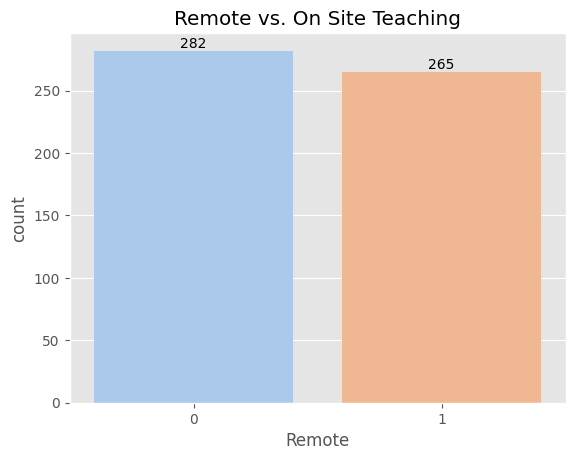

In [669]:
ax = sns.countplot(data = df, x = "Remote", palette = "pastel", hue = "Remote", legend = False)

for label in ax.containers:
    ax.bar_label(label)
    
plt.title("Remote vs. On Site Teaching")
plt.show()

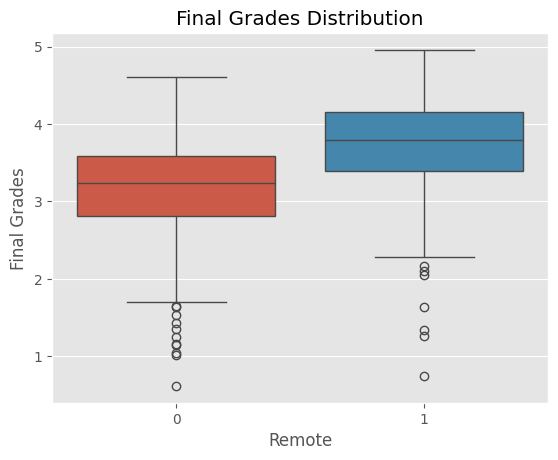

In [670]:
sns.boxplot(data = df, x = "Remote", y = "FG", hue = "Remote", legend = False)

plt.ylabel("Final Grades")
plt.title("Final Grades Distribution")

plt.show()

* The number of students which were taught remotely is akin to the on-site students.
* Students who learned remotely had a better performance.

### Pass or Fail

A student approves a class if $FG \geq 3.00$

In [671]:
df["Pass"] = df["FG"].apply(lambda x: 1 if x >= 3 else 0)
df.head()

,ID,Sex,Class,Semester,Year,Type,G1,G2,G3,FG,Level,Remote,Pass
0,3419,M,Mechanic of Materials,5,2020,Spring,3.602917,3.58750,4.77500,4.067125,sophomore,1,1
1,3418,M,Mechanic of Materials,5,2020,Spring,4.060000,3.83750,4.77500,4.279250,sophomore,1,1
2,3425,M,Mechanic of Materials,5,2020,Spring,3.848688,4.03125,4.73125,4.256481,sophomore,1,1
3,3463,M,Mechanic of Materials,5,2020,Spring,3.580167,3.83750,4.77500,4.135300,sophomore,1,1
4,3393,F,Mechanic of Materials,5,2020,Spring,3.212292,3.10000,5.00000,3.893687,sophomore,1,1


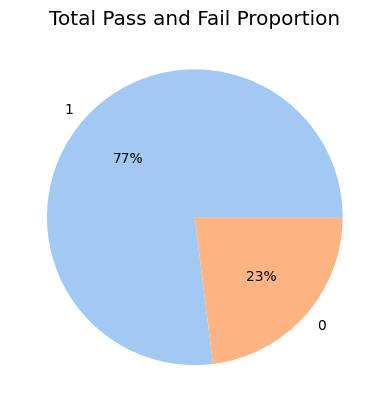

In [672]:
plt.pie(data = pd.DataFrame(df["Pass"].value_counts().reset_index()), x = "count", labels = "Pass", colors = sns.color_palette("pastel"), autopct = "%.0f%%") 
plt.title("Total Pass and Fail Proportion")
plt.show()

The mean rate Pass:Fail was more or less **1:4**

In [673]:
df["Year-Semester"] = df.apply(lambda x: str(x["Year"]) + "-I" if x["Type"] == "Spring" else str(x["Year"]) + "-II" , axis = 1)
df.head()

,ID,Sex,Class,Semester,Year,Type,G1,G2,G3,FG,Level,Remote,Pass,Year-Semester
0,3419,M,Mechanic of Materials,5,2020,Spring,3.602917,3.58750,4.77500,4.067125,sophomore,1,1,2020-I
1,3418,M,Mechanic of Materials,5,2020,Spring,4.060000,3.83750,4.77500,4.279250,sophomore,1,1,2020-I
2,3425,M,Mechanic of Materials,5,2020,Spring,3.848688,4.03125,4.73125,4.256481,sophomore,1,1,2020-I
3,3463,M,Mechanic of Materials,5,2020,Spring,3.580167,3.83750,4.77500,4.135300,sophomore,1,1,2020-I
4,3393,F,Mechanic of Materials,5,2020,Spring,3.212292,3.10000,5.00000,3.893687,sophomore,1,1,2020-I


In [674]:
df_pass_rate = pd.DataFrame(df[["Pass", "Year-Semester"]].groupby("Year-Semester").value_counts(normalize=True).mul(100).round(2).reset_index())
df_pass_rate

,Year-Semester,Pass,proportion
0,2020-I,1,97.06
1,2020-I,0,2.94
2,2020-II,1,95.45
3,2020-II,0,4.55
4,2021-I,1,70.83
5,2021-I,0,29.17
6,2021-II,1,92.77
7,2021-II,0,7.23
8,2022-I,1,77.05
9,2022-I,0,22.95


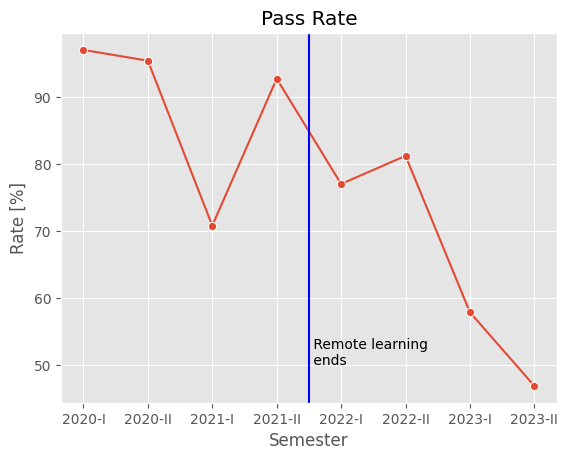

In [675]:
ax = sns.lineplot(data = df_pass_rate[df_pass_rate["Pass"] == 1], y = "proportion", x = "Year-Semester", marker = "o")
ax.axvline(x = 3.5,    
           ymin = 0,
           ymax = 100,
           color = "blue") 

ax.text(3.5, 50, " Remote learning \n ends")

plt.title("Pass Rate")
plt.xlabel("Semester")
plt.ylabel("Rate [%]")
plt.show()

The approval rate decreased throughout the semesters. The classes were becoming more and more demanding, and the return to on-site classes represented a challenge for students, who have had problems adapting again.

In [676]:
df_pass_rate_class = pd.DataFrame(df[["Pass", "Class"]].groupby("Class").value_counts(normalize=True).mul(100).round(2).reset_index())
df_pass_rate_class

,Class,Pass,proportion
0,Applied Dynamics,1,84.06
1,Applied Dynamics,0,15.94
2,Fluid Mechanics,0,51.85
3,Fluid Mechanics,1,48.15
4,Forensic Engineering,1,84.85
5,Forensic Engineering,0,15.15
6,Material Science,1,64.58
7,Material Science,0,35.42
8,Material Selection,1,93.94
9,Material Selection,0,6.06


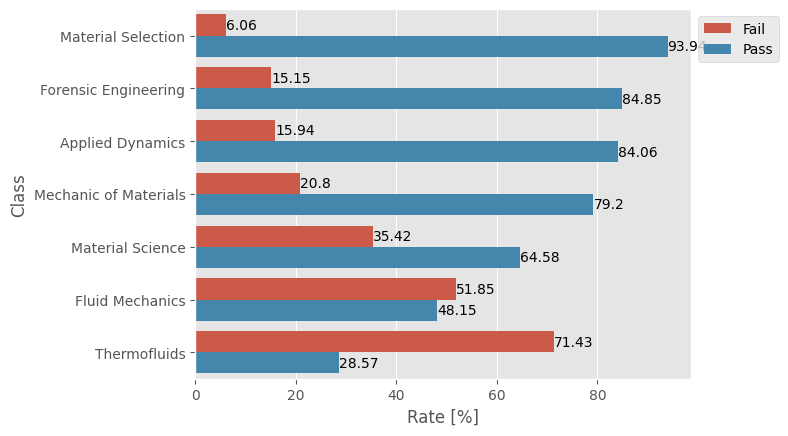

In [677]:
ax = sns.barplot(data = df_pass_rate_class.sort_values(by = ["Pass","proportion"], ascending = False), x = "proportion", y = "Class", hue = "Pass")

legend_handles, labels = ax.get_legend_handles_labels()
ax.legend(legend_handles, ["Fail", "Pass"],
          bbox_to_anchor=(1,1))


for label in ax.containers:
    ax.bar_label(label)

plt.xlabel("Rate [%]")
plt.show()

The classes with the highest number of failures were *Fluid Mechanics* and *Thermofluids*. In particular, *Thermofluids* have the reputation of being one of the most difficult subjects in the degree. On the other hand, the classes with the lowest failure proportion were *Material Selection* and *Forensic Engineering*, both were elective classes at the end of the career.

### **Deep in to the Data**: Answer Some Questions

`1. How has the female proportion changed for each semester?`



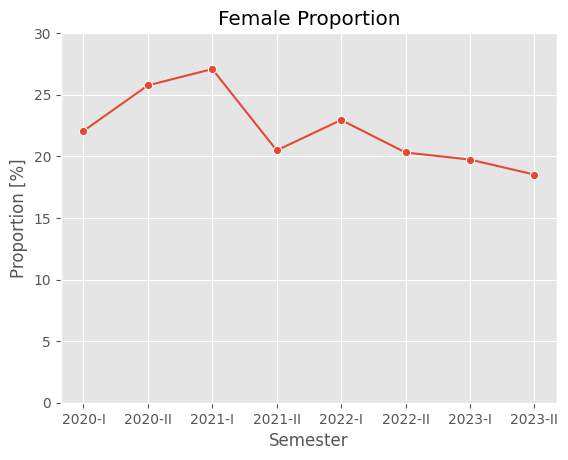

In [678]:
df_sex_proportion = df[["Sex", "Year-Semester"]].groupby("Year-Semester").value_counts(normalize=True).mul(100).round(3).reset_index()

sns.lineplot(data = df_sex_proportion[df_sex_proportion["Sex"] == "F"], 
             y = "proportion", x = "Year-Semester", marker = "o")

plt.title("Female Proportion")
plt.xlabel("Semester")
plt.ylabel("Proportion [%]")
plt.ylim([0, 30])
plt.show()

The proportion of women remained in a range of 18 to 26

`2. Has the number of women increased in the recent generations?`

Let's create a new feature call **Generation** based on the **ID** of the student. Four generations were defined, where *1* belongs to the oldest students and *4* to the youngest.

In [679]:
# Create the bins' boundaries

bins_ID = np.linspace(min(df["ID"]), max(df["ID"]), 5)
bins_ID

array([1967.  , 2549.25, 3131.5 , 3713.75, 4296.  ])

In [680]:
generations = [1, 2, 3, 4]
df["Generation"] = pd.cut(df["ID"], bins = bins_ID, labels = generations, include_lowest = True)
df.head()

,ID,Sex,Class,Semester,Year,Type,G1,G2,G3,FG,Level,Remote,Pass,Year-Semester,Generation
0,3419,M,Mechanic of Materials,5,2020,Spring,3.602917,3.58750,4.77500,4.067125,sophomore,1,1,2020-I,3
1,3418,M,Mechanic of Materials,5,2020,Spring,4.060000,3.83750,4.77500,4.279250,sophomore,1,1,2020-I,3
2,3425,M,Mechanic of Materials,5,2020,Spring,3.848688,4.03125,4.73125,4.256481,sophomore,1,1,2020-I,3
3,3463,M,Mechanic of Materials,5,2020,Spring,3.580167,3.83750,4.77500,4.135300,sophomore,1,1,2020-I,3
4,3393,F,Mechanic of Materials,5,2020,Spring,3.212292,3.10000,5.00000,3.893687,sophomore,1,1,2020-I,3


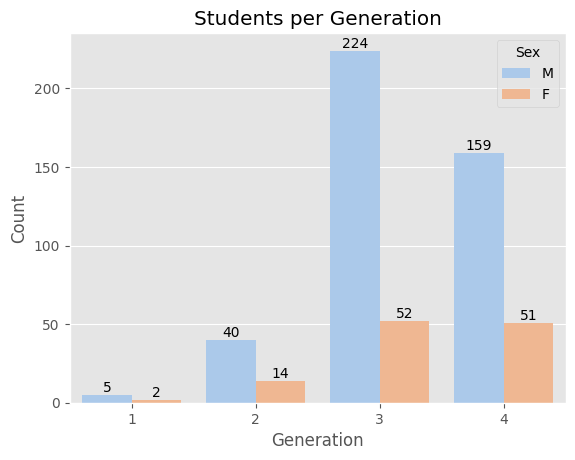

In [681]:
# Count

ax = sns.countplot(data = df, x = "Generation", hue = "Sex", palette = "pastel")

for label in ax.containers:
    ax.bar_label(label)

plt.title("Students per Generation")
plt.xlabel("Generation")
plt.ylabel("Count")
plt.show()

C:\Users\acast\AppData\Local\Temp\ipykernel_24952\2264490506.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_sex_generation = df[["Sex", "Generation"]].groupby("Generation").value_counts(normalize=True).mul(100).round(2).reset_index()


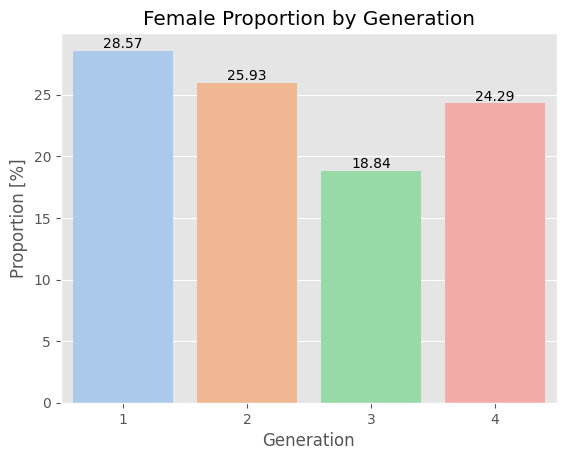

In [682]:
# Proportion

df_sex_generation = df[["Sex", "Generation"]].groupby("Generation").value_counts(normalize=True).mul(100).round(2).reset_index()

ax = sns.barplot(data = df_sex_generation[df_sex_generation["Sex"] == "F"],
                 y = "proportion", x = "Generation", palette = "pastel", hue = "Generation", legend = False)

for label in ax.containers:
    ax.bar_label(label)

plt.title("Female Proportion by Generation")
plt.xlabel("Generation")
plt.ylabel("Proportion [%]")

plt.show()

The numbers of women has increased over the generations; nonetheless, the female proportion has been approximately the same for each generation. This proportion is between *18% and 29%*. Therefore, the increase of the women is related with a overall increase in student population.

`3. Who has had a better performance?`

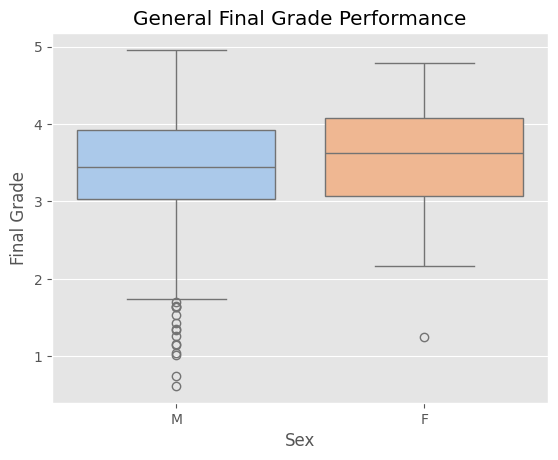

In [683]:
sns.boxplot(data = df, x = "Sex", y = "FG", hue = "Sex", palette = "pastel")

plt.title("General Final Grade Performance")
plt.ylabel("Final Grade")
plt.show()

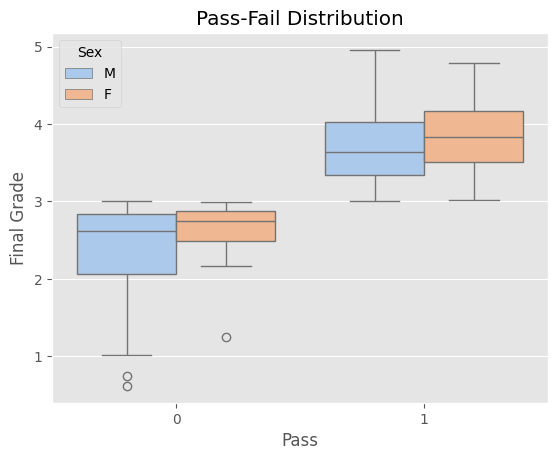

In [684]:
sns.boxplot(data = df, x = "Pass", y = "FG", hue = "Sex", palette = "pastel")

plt.title("Pass-Fail Distribution")
plt.ylabel("Final Grade")
plt.show()

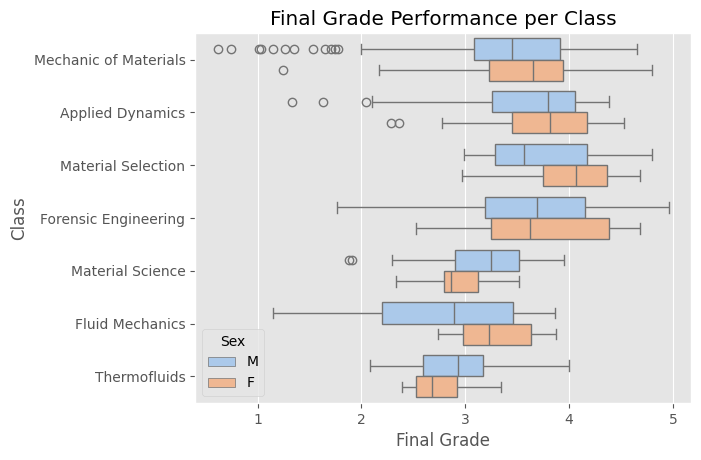

In [685]:
sns.boxplot(data = df, x = "FG", y = "Class", hue = "Sex", palette = "pastel")

plt.title("Final Grade Performance per Class")
plt.xlabel("Final Grade")
plt.ylabel("Class")
plt.show()

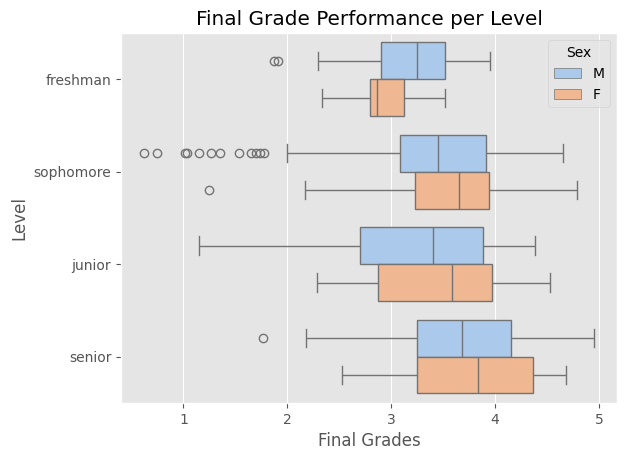

In [686]:
sns.boxplot(data = df, x = "FG", y = "Level", hue = "Sex", palette = "pastel", order = ["freshman", "sophomore", "junior", "senior"])

plt.title("Final Grade Performance per Level")
plt.ylabel("Level")
plt.xlabel("Final Grades")
plt.show()

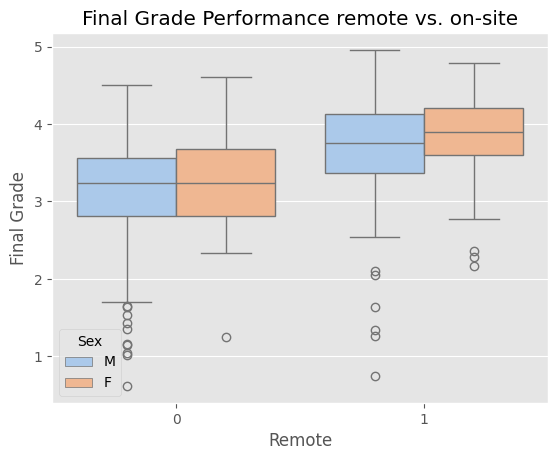

In [687]:
sns.boxplot(data = df, x = "Remote", y = "FG", hue = "Sex", palette = "pastel")

plt.title("Final Grade Performance remote vs. on-site")
plt.ylabel("Final Grade")
plt.show()

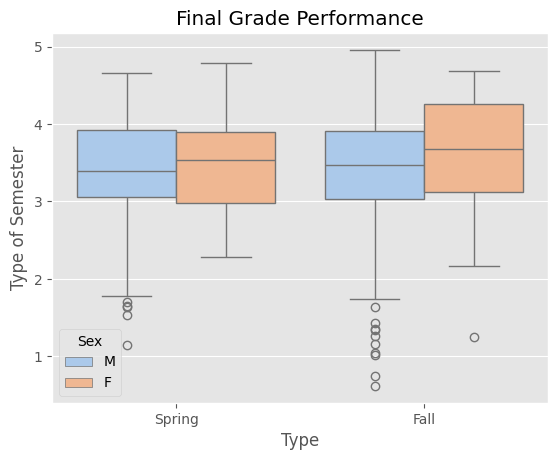

In [688]:
sns.boxplot(data = df, x = "Type", y = "FG", hue = "Sex", palette = "pastel")

plt.title("Final Grade Performance")
plt.ylabel("Type of Semester")
plt.show()

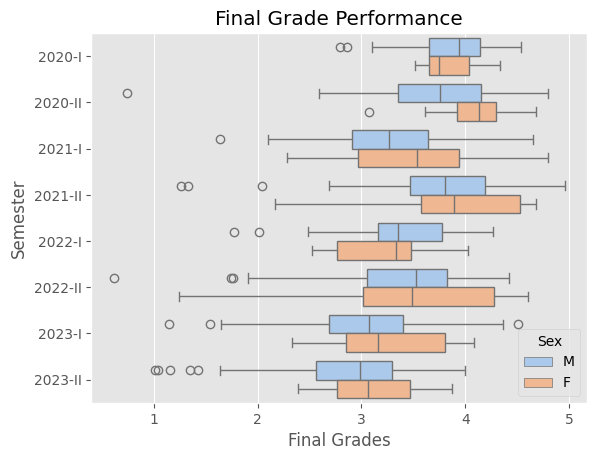

In [689]:
sns.boxplot(data = df, x = "FG", y = "Year-Semester", hue = "Sex", palette = "pastel")

plt.title("Final Grade Performance")
plt.ylabel("Semester")
plt.xlabel("Final Grades")
plt.show()

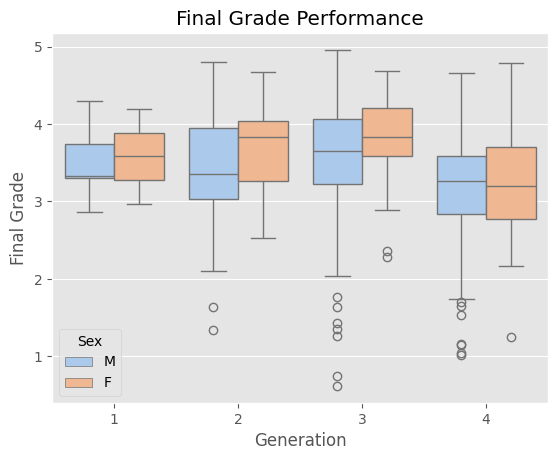

In [690]:
sns.boxplot(data = df, x = "Generation", y = "FG", hue = "Sex", palette = "pastel")

plt.title("Final Grade Performance")
plt.ylabel("Final Grade")
plt.show()

* Overall, women have a slightly better performance.
* In both the pass and fail groups, women obtained higher grades.
* Women have better performance in classes such as Material Selection and Fluid Mechanics. By contrast, men are better in Material Science and Thermofluids.
* Only on the freshman level, men have better performance than women.
* Both women and men have a similar performance on-site learning, but in remote mode, women were better.
* Women have better performance in fall semesters.
* Both women and men have had a decrease in performance in the last years.
* Women from generations groups 1, 2, and 3 had have a better performance.
* In general, there are more men with poor performance. This can be seen as the outliers in the lower section of the distribution.



`4. Performance Before and After Pandemic`

The only class which is present in all the semesters from 2020 to 2023 was *Mechanic of Materials*. So it's possible to compare the students performance during pandemic (2020-2021) and after pandemic (2022-2023)

In [691]:
df_mechanic_materials = df[df["Class"] == "Mechanic of Materials"][["Remote", "FG", "Pass", "Year-Semester"]]
df_mechanic_materials

,Remote,FG,Pass,Year-Semester
0,1,4.067125,1,2020-I
1,1,4.279250,1,2020-I
2,1,4.256481,1,2020-I
3,1,4.135300,1,2020-I
4,1,3.893687,1,2020-I
...,...,...,...,...
494,0,3.253634,1,2023-II
495,0,3.582693,1,2023-II
496,0,2.347957,0,2023-II
497,0,2.613524,0,2023-II


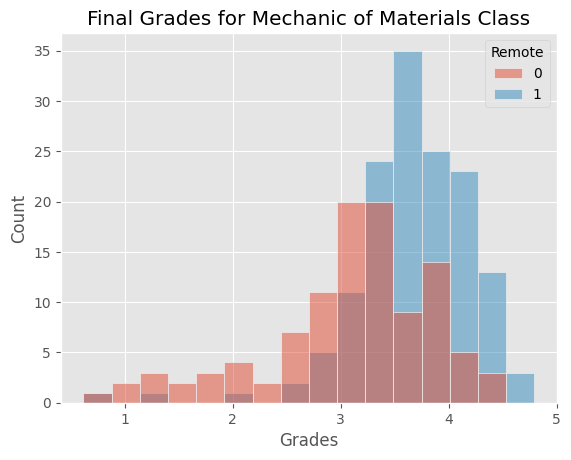

In [692]:
ax = sns.histplot(data = df_mechanic_materials, x = "FG", hue = "Remote")

plt.xlabel("Grades")
plt.title("Final Grades for Mechanic of Materials Class")

plt.show()

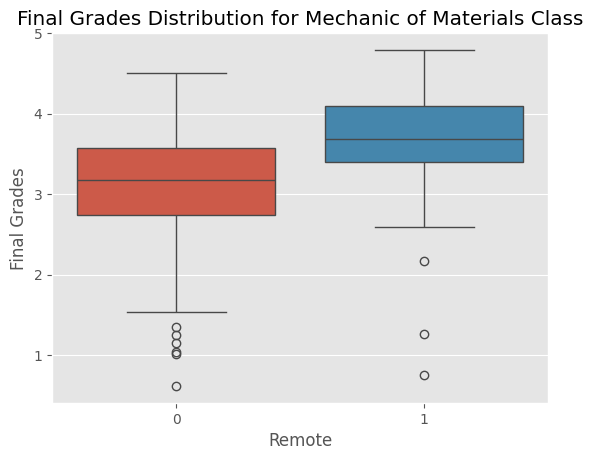

In [693]:
sns.boxplot(data = df_mechanic_materials, x = "Remote", y = "FG", hue = "Remote", legend = False)

plt.ylabel("Final Grades")
plt.title("Final Grades Distribution for Mechanic of Materials Class")

plt.show()

In [694]:
df_MM_pass_rate = pd.DataFrame(df_mechanic_materials[["Pass", "Year-Semester"]].groupby("Year-Semester").value_counts(normalize=True).mul(100).round(2).reset_index())
df_MM_pass_rate

,Year-Semester,Pass,proportion
0,2020-I,1,97.06
1,2020-I,0,2.94
2,2020-II,1,92.00
3,2020-II,0,8.00
4,2021-I,1,80.95
5,2021-I,0,19.05
6,2021-II,1,86.67
7,2021-II,0,13.33
8,2022-I,1,77.78
9,2022-I,0,22.22


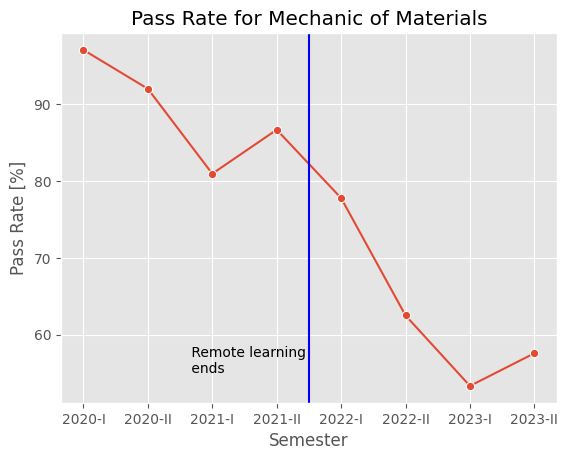

In [695]:
ax = sns.lineplot(data = df_MM_pass_rate[df_MM_pass_rate["Pass"] == 1], y = "proportion", x = "Year-Semester", marker = "o")
ax.axvline(x = 3.5,    
           ymin = 0, #
           ymax = 100,
           color = "blue") 

ax.text(1.6, 55, " Remote learning \n ends")

plt.title("Pass Rate for Mechanic of Materials")
plt.xlabel("Semester")
plt.ylabel("Pass Rate [%]")
plt.show()

Students from Mechanic of Materials class had a similar behavior respect the overall students both Final Grades and Pass rate.

`5. What did happen in semester 2021-I?`

Semester 2021-I had a different behavior based on the tendency of the pass rate for the overall students.

In [696]:
df_2021_1 = df[df["Year-Semester"] == "2021-I"]
df_2021_1.head()

,ID,Sex,Class,Semester,Year,Type,G1,G2,G3,FG,Level,Remote,Pass,Year-Semester,Generation
134,3569,F,Applied Dynamics,6,2021,Spring,3.833299,3.039396,4.070833,3.690142,junior,1,1,2021-I,3
135,3331,M,Applied Dynamics,6,2021,Spring,2.163750,2.276792,3.255382,2.634315,junior,1,0,2021-I,3
136,3038,M,Applied Dynamics,6,2021,Spring,3.038580,2.305615,3.822326,3.132189,junior,1,1,2021-I,2
137,3436,F,Applied Dynamics,6,2021,Spring,2.169739,1.316667,3.294444,2.363699,junior,1,0,2021-I,3
138,3823,F,Applied Dynamics,6,2021,Spring,3.116027,1.203000,3.692431,2.772680,junior,1,0,2021-I,4


In [697]:
## Pass Rate
df["Pass"].value_counts(normalize = "True").mul(100).round(2).reset_index()

,Pass,proportion
0,1,76.97
1,0,23.03


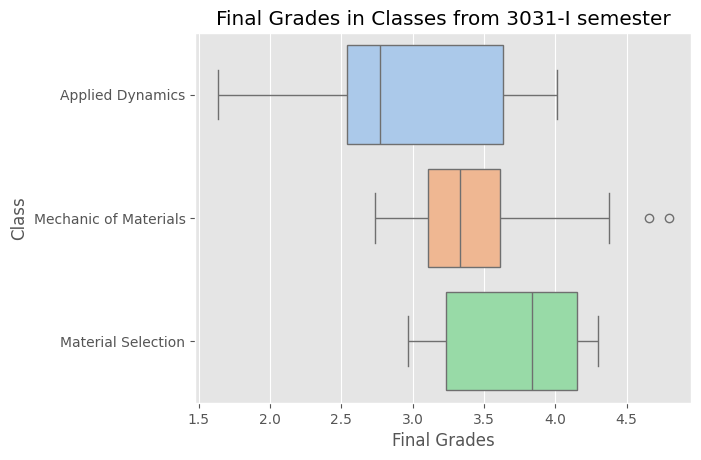

In [698]:
sns.boxplot(data = df_2021_1, x = "FG", y = "Class", hue = "Class", palette = "pastel", legend = False)

plt.xlabel("Final Grades")
plt.title("Final Grades in Classes from 3031-I semester")
plt.show()

In [699]:
df_2021_1["Class"].value_counts(normalize = True).mul(100).round(2).reset_index()

,Class,proportion
0,Mechanic of Materials,43.75
1,Applied Dynamics,35.42
2,Material Selection,20.83


It looks like that there was a poor performance for the *Applied Dynamics* Class. Let's compare this class in all semesters where it was taught.

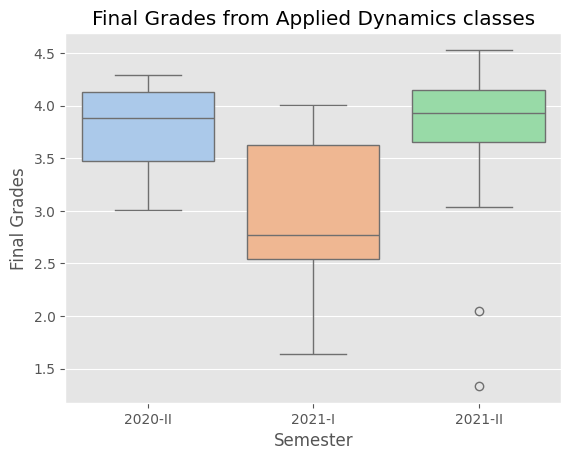

In [700]:
sns.boxplot(data = df[df["Class"] == "Applied Dynamics"], x = "Year-Semester", y = "FG", hue = "Year-Semester", palette = "pastel", legend = False)

plt.ylabel("Final Grades")
plt.xlabel("Semester")
plt.title("Final Grades from Applied Dynamics classes")
plt.show()

In [701]:
df[df["Class"] == "Applied Dynamics"][["Year-Semester", "Pass"]].groupby("Year-Semester").value_counts(normalize = True).mul(100).round(2).reset_index()

,Year-Semester,Pass,proportion
0,2020-II,1,100.00
1,2021-I,0,52.94
2,2021-I,1,47.06
3,2021-II,1,92.59
4,2021-II,0,7.41


Indeed, the students from Applied Dynamics at 3031-I semester had a poor performance, With an pass rate of half compared to other years.

### **Feature Correlation**

In [702]:
df.head()

,ID,Sex,Class,Semester,Year,Type,G1,G2,G3,FG,Level,Remote,Pass,Year-Semester,Generation
0,3419,M,Mechanic of Materials,5,2020,Spring,3.602917,3.58750,4.77500,4.067125,sophomore,1,1,2020-I,3
1,3418,M,Mechanic of Materials,5,2020,Spring,4.060000,3.83750,4.77500,4.279250,sophomore,1,1,2020-I,3
2,3425,M,Mechanic of Materials,5,2020,Spring,3.848688,4.03125,4.73125,4.256481,sophomore,1,1,2020-I,3
3,3463,M,Mechanic of Materials,5,2020,Spring,3.580167,3.83750,4.77500,4.135300,sophomore,1,1,2020-I,3
4,3393,F,Mechanic of Materials,5,2020,Spring,3.212292,3.10000,5.00000,3.893687,sophomore,1,1,2020-I,3


In [703]:
# Numerical Features
numerical = ["ID", "G1", "G2", "G3", "FG"]
categorical = ["Sex", "Class", "Semester", "Year", "Type", "Level", "Remote", "Pass", "Year-Semester", "Generation"]

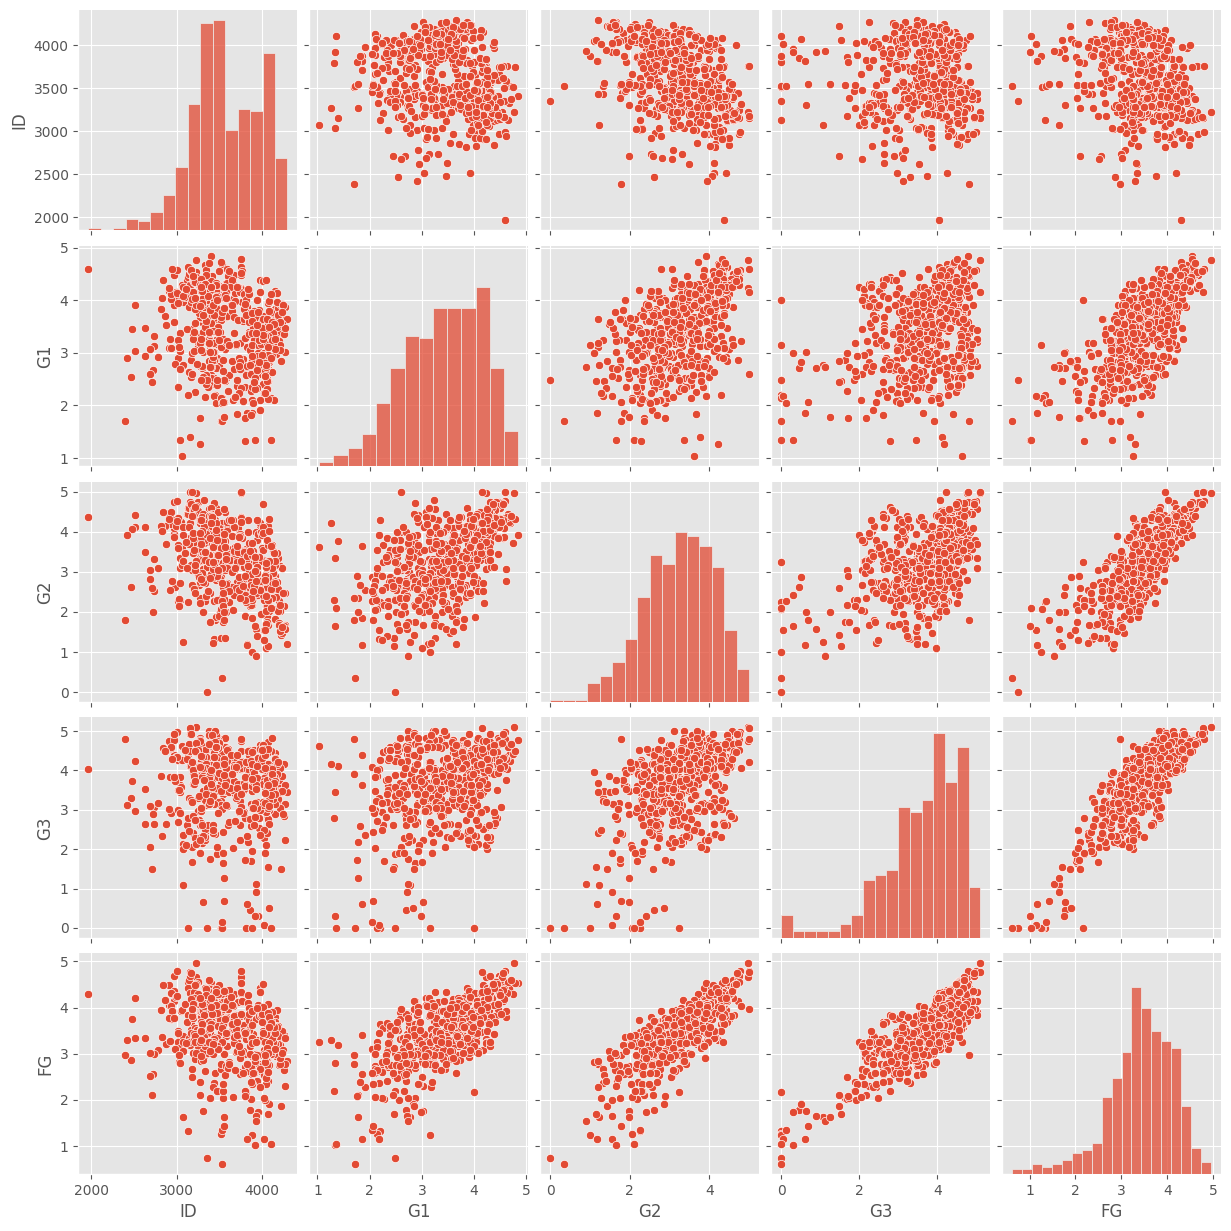

In [704]:
sns.pairplot(data = df[numerical])
plt.show()

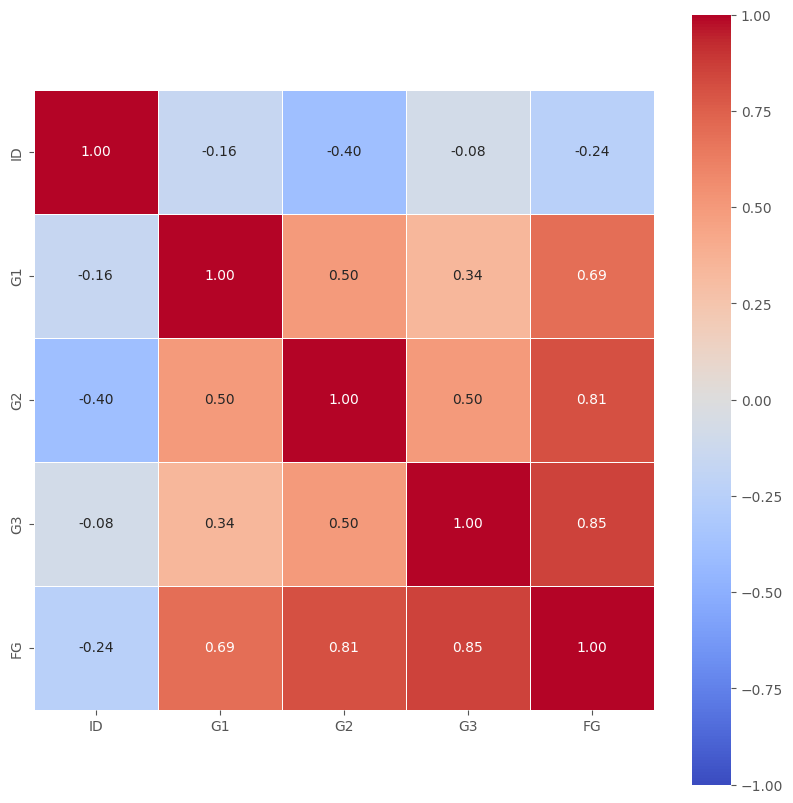

In [705]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df[numerical].corr(method = "pearson"), vmin = - 1, vmax = 1, center = 0, fmt='.2f',
                square = True, linewidths = 0.5, annot = True, cmap = 'coolwarm')
plt.show()

A high correlation exists between **G1**, **G2**, **G3** and **FG**, because the *Final Grade* is calculated based on the grades for periods 1, 2 and 3 of the semester.

For the predictive model selection, only **G1** and **G2** will be taken into account, since if you have the grades for the three periods the Final Grade will be computed using the equation presented above. 

# Predictive Model

### **Prepare Data**

In [706]:
features = ["ID", "Sex", "Year", "Type", "G1", "G2", "Level", "Generation"]

df_features = df[features]
df_features.head()

,ID,Sex,Year,Type,G1,G2,Level,Generation
0,3419,M,2020,Spring,3.602917,3.58750,sophomore,3
1,3418,M,2020,Spring,4.060000,3.83750,sophomore,3
2,3425,M,2020,Spring,3.848688,4.03125,sophomore,3
3,3463,M,2020,Spring,3.580167,3.83750,sophomore,3
4,3393,F,2020,Spring,3.212292,3.10000,sophomore,3


In [707]:
# Regression
y_numerical = df["FG"]

# Classification
y_categorical = df["Pass"]

In [708]:
## Data transformation

# Scale Numerical Features
num_features = ["ID", "G1", "G2"]
num_transformer = Pipeline(steps = [("scaler", StandardScaler())])

# Encoder Binary Features
binary_features = ["Sex", "Type"]
binary_transformer = Pipeline(steps = [("one_hot_encoder", OneHotEncoder(drop = "first"))])

# Encoder Ordinal Features
ordinal_feature = ["Year", "Level", "Generation"]
ordinal_transformer = Pipeline(steps = [("ordinal_encoder", OrdinalEncoder())])

# Column Transformations
column_trans  = ColumnTransformer([
     ('num_imputer', num_transformer, num_features),
     ('ohe_encoder', binary_transformer, binary_features),
     ('ord_encoder', ordinal_transformer, ordinal_feature)])

### **Regression**

Output variable would be **FG**. 

**6** regression models will be compared:

- Linear Regression
- Ridge Regression
- Lasso Regression
- Support Vector Regression (SVR)
- Random Forest Regression
- Polynomial Regression

In [709]:
# DataFrame to save R2 Score for Regression Models
regression_models = pd.DataFrame({"Name" : [], "R2 Score" : []})
regression_models

,Name,R2 Score


In [710]:
# Split Data for Regression Data
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(df_features, y_numerical, test_size = 0.2)

**Linear Regression**

In [711]:
model_1 = LinearRegression()

pipeline_1 = Pipeline([('prep',column_trans),
                     ('model', model_1)])

scores_1 = cross_val_score(pipeline_1, df_features, y_numerical, cv = 10, scoring = "r2")

row_1 = {"Name" : "Linear Regression", 
         "R2 Score" : scores_1.mean()}

regression_models = pd.concat([regression_models, pd.DataFrame([row_1])], ignore_index = True)

regression_models

,Name,R2 Score
0,Linear Regression,0.748865


**Ridge Regression**

In [712]:
alphas = np.arange(0.1, 20, 0.1)

model_2 = RidgeCV(alphas = alphas, scoring = "r2")

pipeline_2 = Pipeline([('prep',column_trans),
                     ('model', model_2)])

scores_2 = cross_val_score(pipeline_2, df_features, y_numerical, cv = 10, scoring = "r2")

row_2 = {"Name" : f"Ridge Regression", 
         "R2 Score" : scores_2.mean()}

regression_models = pd.concat([regression_models, pd.DataFrame([row_2])], ignore_index = True)

regression_models


,Name,R2 Score
0,Linear Regression,0.748865
1,Ridge Regression,0.748281


**Lasso Regression**

In [713]:
alphas = np.arange(0.1, 20, 0.1)

model_3 = LassoCV(alphas = alphas)

pipeline_3 = Pipeline([('prep',column_trans),
                     ('model', model_3)])

scores_3 = cross_val_score(pipeline_3, df_features, y_numerical, cv = 10, scoring = "r2")

row_3 = {"Name" : f"Lasso Regression", 
         "R2 Score" : scores_3.mean()}

regression_models = pd.concat([regression_models, pd.DataFrame([row_3])], ignore_index = True)

regression_models

,Name,R2 Score
0,Linear Regression,0.748865
1,Ridge Regression,0.748281
2,Lasso Regression,0.565435


**Support Vector Regression (SVR)**

In [714]:
model_4 = SVR()

pipeline_4 = Pipeline([('prep',column_trans),
                     ('model', model_4)])

scores_4 = cross_val_score(pipeline_4, df_features, y_numerical, cv = 10, scoring = "r2")

row_4 = {"Name" : "SVR", 
         "R2 Score" : scores_4.mean()}

regression_models = pd.concat([regression_models, pd.DataFrame([row_4])], ignore_index = True)

regression_models

,Name,R2 Score
0,Linear Regression,0.748865
1,Ridge Regression,0.748281
2,Lasso Regression,0.565435
3,SVR,0.742541


**Random Forest Regressor**

In [715]:
model_5 = RandomForestRegressor()

pipeline_5 = Pipeline([('prep',column_trans),
                     ('model', model_5)])

scores_5 = cross_val_score(pipeline_5, df_features, y_numerical, cv = 10, scoring = "r2")

row_5 = {"Name" : "Random Forest Regression", 
         "R2 Score" : scores_5.mean()}

regression_models = pd.concat([regression_models, pd.DataFrame([row_5])], ignore_index = True)

regression_models

,Name,R2 Score
0,Linear Regression,0.748865
1,Ridge Regression,0.748281
2,Lasso Regression,0.565435
3,SVR,0.742541
4,Random Forest Regression,0.689991


**Polynomial Regression**

In [716]:
pf = PolynomialFeatures(degree = 2)

x_pf = pf.fit_transform(column_trans.fit_transform(df_features))

model_6 = LinearRegression()

scores_6 = cross_val_score(model_6, x_pf, y_numerical, cv = 10, scoring = "r2")

row_6 = {"Name" : "Polynomial Regression", 
         "R2 Score" : scores_6.mean()}

regression_models = pd.concat([regression_models, pd.DataFrame([row_6])], ignore_index = True)

regression_models

,Name,R2 Score
0,Linear Regression,0.748865
1,Ridge Regression,0.748281
2,Lasso Regression,0.565435
3,SVR,0.742541
4,Random Forest Regression,0.689991
5,Polynomial Regression,0.462854


**Best Model**

After comparing the performance of 6 regression models using cross-validation, the best model was **Linear Regression**

Test Score: 81.8%
Train Score: 83.04%


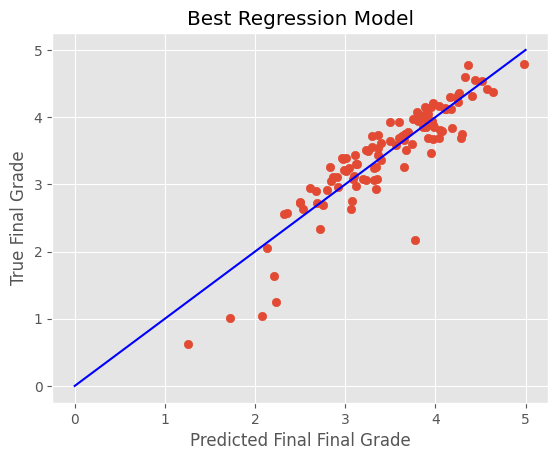

In [717]:
model_1 = LinearRegression()

pipeline_2 = Pipeline([('prep',column_trans),
                     ('model', model_1)])

pipeline_2.fit(x_train_1, y_train_1)


print(f"Test Score: {round(pipeline_2.score(x_test_1, y_test_1) * 100, 2)}%")
print(f"Train Score: {round(pipeline_2.score(x_train_1, y_train_1) * 100, 2)}%")


plt.scatter(pipeline_2.predict(x_test_1), y_test_1, marker = "o")
plt.plot([0, 5], [0, 5], color = "blue")
plt.xlabel("Predicted Final Final Grade")
plt.ylabel("True Final Grade")
plt.title("Best Regression Model")
plt.show()

When the **Linear Regression** models is applied to the tran-test split the *R2-Score* is higher than than that obtained with cross validation. On of the reason for this difference is that cross validation introduces additional variability due to randomness in fold selection. On the other hand, the sample size is small, cross-validation may be more sensitive to variability. Nonetheless, the performance of the predictive model for both test set and train set are very similar, therefore this is an indication that overfitting is not occurring.

**Recursive Feature Elimination (RFE) for Regression**

An addition analysis related to feature significance is performed to find out **which features have the greatest impact on the model?**

In [718]:
refcv_r = RFECV(estimator = LinearRegression())

pipeline_rfe = Pipeline([('prep',column_trans),
                        ("Feature Selection",refcv_r),
                        ('model', LinearRegression())])

pipeline_rfe.fit(x_train_1, y_train_1)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num_imputer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['ID', 'G1', 'G2']),
                                                 ('ohe_encoder',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Sex', 'Type']),
                                                 ('ord_encoder',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Year', 'Level',
                                                   'Generation'])])),
                ('Feature Selection', RFECV(estimator=LinearRegression())),
                ('model', LinearRegression())])

In [719]:
pd.DataFrame(list(zip(pipeline_rfe[0].get_feature_names_out().tolist(), refcv_r.support_.tolist())), columns = ["Feature", "Importance"]).sort_values(by = "Importance", ascending = False)

,Feature,Importance
0,num_imputer__ID,True
1,num_imputer__G1,True
2,num_imputer__G2,True
4,ohe_encoder__Type_Spring,True
5,ord_encoder__Year,True
7,ord_encoder__Generation,True
3,ohe_encoder__Sex_M,False
6,ord_encoder__Level,False


According to RFE analysis **Sex** and **Level** features have a low significance for the predictive model. 

*R2-Score* is calculated for the **Linear Regression** model without taking into account these features:

Test Score: 82.54%
Train Score: 82.88%


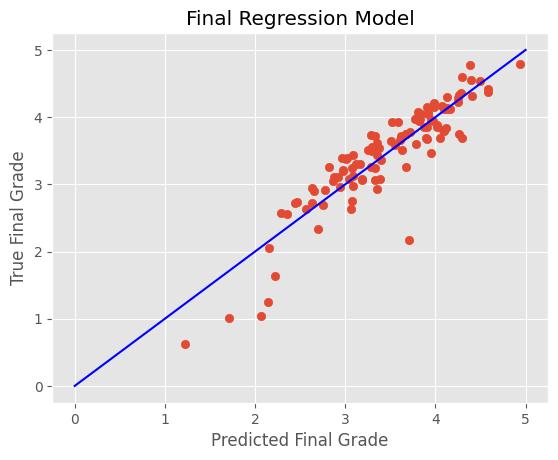

In [720]:
model_final_r = LinearRegression()


column_trans_final  = ColumnTransformer([
     ('num_imputer', num_transformer, ["ID", "G1", "G2"]),
     ('ohe_encoder', binary_transformer, ["Type"]),
     ('ord_encoder', ordinal_transformer, ["Year", "Generation"])])


pipeline_r = Pipeline([('prep',column_trans_final),
                     ('model', model_final_r)])

pipeline_r.fit(x_train_1, y_train_1)


print(f"Test Score: {round(pipeline_r.score(x_test_1, y_test_1) * 100, 2)}%")
print(f"Train Score: {round(pipeline_r.score(x_train_1, y_train_1) * 100, 2)}%")


plt.scatter(pipeline_r.predict(x_test_1), y_test_1, marker = "o")
plt.plot([0, 5], [0, 5], color = "blue")
plt.xlabel("Predicted Final Grade")
plt.ylabel("True Final Grade")
plt.title("Final Regression Model")
plt.show()

An identical performance has been obtained with the model considering **all the features** and without taking into account **Sex** and **Level**. 

In the second case, the model is simpler; however, more data is needed to confirm the significance of the features.

### **Classification**

Output variable would be **Pass**

**3** binary classification models will be compared

- Logistic Regression
- Support Vector Classifier (SVC)
- Random Forest Classifier

In [721]:
# DataFrame to save F1-weighted score for binary classification unbalanced Models

classification_models = pd.DataFrame({"Name" : [], "F1 Score" : []})
classification_models

,Name,F1 Score


In [722]:
# DataFrame to save F1-weighted score for classification Models
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(df_features, y_categorical, test_size = 0.2)

**Logistic Regression**

In [723]:
model_1 = LogisticRegression()

pipeline_1 = Pipeline([('prep',column_trans),
                     ('model', model_1)])

scores_1 = cross_val_score(pipeline_1, df_features, y_categorical, cv = 10, scoring = "f1_weighted")

row_1 = {"Name" : "Logistic Regression", 
         "F1 Score" : scores_1.mean()}

classification_models = pd.concat([classification_models, pd.DataFrame([row_1])], ignore_index = True)

classification_models

,Name,F1 Score
0,Logistic Regression,0.869746


Test Score: 86.36%
Train Score: 92.68%
              precision    recall  f1-score   support

           0       0.65      0.68      0.67        22
           1       0.92      0.91      0.91        88

    accuracy                           0.86       110
   macro avg       0.79      0.80      0.79       110
weighted avg       0.87      0.86      0.86       110



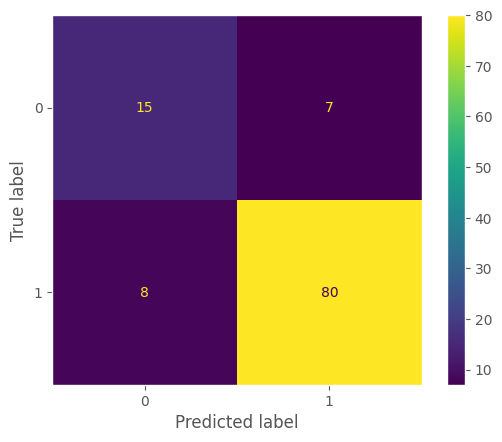

In [724]:
pipeline_1.fit(x_train_2, y_train_2)

print(f"Test Score: {round(pipeline_1.score(x_test_2, y_test_2) * 100, 2)}%")
print(f"Train Score: {round(pipeline_1.score(x_train_2, y_train_2) * 100, 2)}%")

plt.rcParams['axes.grid'] = False
score_train = round(pipeline_1.score(x_train_2, y_train_2) * 100, 2)
score_test = round(pipeline_1.score(x_test_2, y_test_2) *100, 2)
cm = confusion_matrix(y_test_2, pipeline_1.predict(x_test_2), labels = pipeline_1.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = pipeline_1.classes_).plot()
print(classification_report(y_test_2, pipeline_1.predict(x_test_2), labels = pipeline_1.classes_))

**SVC**

In [725]:
model_2 = SVC()

pipeline_2 = Pipeline([('prep',column_trans),
                     ('model', model_2)])

scores_2 = cross_val_score(pipeline_2, df_features, y_categorical, cv = 10, scoring = "f1_weighted")

row_2 = {"Name" : "SVC", 
         "F1 Score" : scores_2.mean()}

classification_models = pd.concat([classification_models, pd.DataFrame([row_2])], ignore_index = True)

classification_models

,Name,F1 Score
0,Logistic Regression,0.869746
1,SVC,0.848803


Test Score: 91.82%
Train Score: 93.14%
              precision    recall  f1-score   support

           0       0.88      0.68      0.77        22
           1       0.92      0.98      0.95        88

    accuracy                           0.92       110
   macro avg       0.90      0.83      0.86       110
weighted avg       0.92      0.92      0.91       110



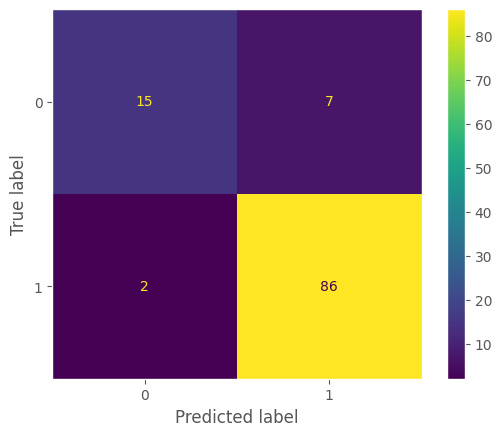

In [726]:
pipeline_2.fit(x_train_2, y_train_2)

print(f"Test Score: {round(pipeline_2.score(x_test_2, y_test_2) * 100, 2)}%")
print(f"Train Score: {round(pipeline_2.score(x_train_2, y_train_2) * 100, 2)}%")

plt.rcParams['axes.grid'] = False
score_train = round(pipeline_2.score(x_train_2, y_train_2) * 100, 2)
score_test = round(pipeline_2.score(x_test_2, y_test_2) *100, 2)
cm = confusion_matrix(y_test_2, pipeline_2.predict(x_test_2), labels = pipeline_2.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = pipeline_2.classes_).plot()
print(classification_report(y_test_2, pipeline_2.predict(x_test_2), labels = pipeline_2.classes_))

**Random Forest Classifier**

In [727]:
model_3 = RandomForestClassifier()

pipeline_3 = Pipeline([('prep',column_trans),
                     ('model', model_3)])

scores_3 = cross_val_score(pipeline_3, df_features, y_categorical, cv = 10, scoring = "f1_weighted")

row_3 = {"Name" : "Random Fores Classifier", 
         "F1 Score" : scores_3.mean()}

classification_models = pd.concat([classification_models, pd.DataFrame([row_3])], ignore_index = True)

classification_models

,Name,F1 Score
0,Logistic Regression,0.869746
1,SVC,0.848803
2,Random Fores Classifier,0.824742


Test Score: 90.0%
Train Score: 100.0%
              precision    recall  f1-score   support

           0       0.82      0.64      0.72        22
           1       0.91      0.97      0.94        88

    accuracy                           0.90       110
   macro avg       0.87      0.80      0.83       110
weighted avg       0.90      0.90      0.89       110



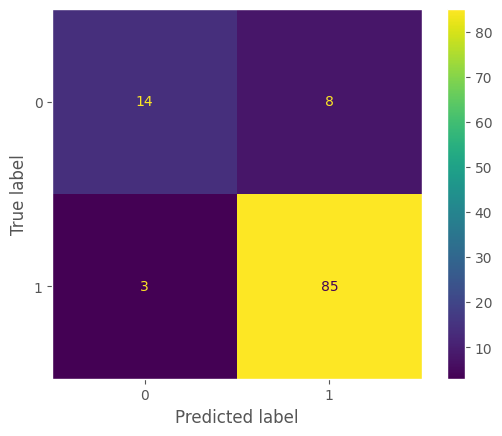

In [728]:
pipeline_3.fit(x_train_2, y_train_2)

print(f"Test Score: {round(pipeline_3.score(x_test_2, y_test_2) * 100, 2)}%")
print(f"Train Score: {round(pipeline_3.score(x_train_2, y_train_2) * 100, 2)}%")

plt.rcParams['axes.grid'] = False
score_train = round(pipeline_3.score(x_train_2, y_train_2) * 100, 2)
score_test = round(pipeline_3.score(x_test_2, y_test_2) *100, 2)
cm = confusion_matrix(y_test_2, pipeline_3.predict(x_test_2), labels = pipeline_3.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = pipeline_3.classes_).plot()
print(classification_report(y_test_2, pipeline_3.predict(x_test_2), labels = pipeline_3.classes_))

After comparing the performance of the classification models using cross-validation, the best model was **Logistic Regression**

**Recursive Feature Elimination (RFE) for Classifier**

An addition analysis related to feature significance is performed to find out **which features have the greatest impact on the model?**

In [729]:
refcv_c = RFECV(estimator = LogisticRegression())

pipeline_rfe = Pipeline([('prep',column_trans),
                        ("Feature Selection",refcv_c),
                        ('model', LogisticRegression())])

pipeline_rfe.fit(x_train_2, y_train_2)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num_imputer',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['ID', 'G1', 'G2']),
                                                 ('ohe_encoder',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['Sex', 'Type']),
                                                 ('ord_encoder',
                                                  Pipeline(steps=[('ordinal_encoder',
                                                                   OrdinalEncoder())]),
                                                  ['Year', 'Level',
                                                   'Generation'])])),
                ('Feature Selection', RFECV(estimator=LogisticRegression())),
                ('model', LogisticRegression())])

In [730]:
pd.DataFrame(list(zip(pipeline_rfe[0].get_feature_names_out().tolist(), refcv_c.support_.tolist())), columns = ["Feature", "Importance"]).sort_values(by = "Importance", ascending = False)

,Feature,Importance
0,num_imputer__ID,True
1,num_imputer__G1,True
2,num_imputer__G2,True
3,ohe_encoder__Sex_M,True
5,ord_encoder__Year,True
7,ord_encoder__Generation,True
4,ohe_encoder__Type_Spring,False
6,ord_encoder__Level,False


According to RFE analysis **Level** and **Type** features have a low significance for the predictive model. 

*F1-Score* is calculated for the **Logistic Regression** model without taking into account these features:

Test Score: 89.09%
Train Score: 91.99%
              precision    recall  f1-score   support

           0       0.71      0.77      0.74        22
           1       0.94      0.92      0.93        88

    accuracy                           0.89       110
   macro avg       0.83      0.85      0.84       110
weighted avg       0.90      0.89      0.89       110



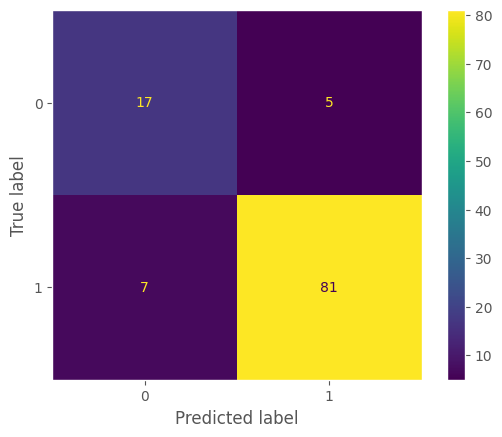

In [731]:
model_final_c = LogisticRegression()


column_trans_final  = ColumnTransformer([
     ('num_imputer', num_transformer, ["ID", "G1", "G2"]),
     ('ohe_encoder', binary_transformer, ["Sex"]),
     ('ord_encoder', ordinal_transformer, ["Year", "Generation"])])


pipeline_c = Pipeline([('prep',column_trans_final),
                     ('model', model_final_c)])

pipeline_c.fit(x_train_2, y_train_2)


print(f"Test Score: {round(pipeline_c.score(x_test_2, y_test_2) * 100, 2)}%")
print(f"Train Score: {round(pipeline_c.score(x_train_2, y_train_2) * 100, 2)}%")

plt.rcParams['axes.grid'] = False
score_train = round(pipeline_c.score(x_train_2, y_train_2) * 100, 2)
score_test = round(pipeline_c.score(x_test_2, y_test_2) *100, 2)
cm = confusion_matrix(y_test_2, pipeline_c.predict(x_test_2), labels = pipeline_c.classes_)
ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = pipeline_c.classes_).plot()
print(classification_report(y_test_2, pipeline_c.predict(x_test_2), labels = pipeline_c.classes_))


An identical performance has been obtained with the model considering **all the features** and without taking into account **Level** and **Type**. 

In the second case, the model is simpler; however, more data is needed to confirm the significance of the features.

## References

[How to Perform Feature Selection with Categorical Data](https://machinelearningmastery.com/feature-selection-with-categorical-data/)

[Metrics and scoring: quantifying the quality of predictions](https://scikit-learn.org/stable/modules/model_evaluation.html)

[Recursive Feature(RFE) Elimination with Scikit-learn](https://medium.com/@loyfordmwenda/recursive-feature-rfe-elimination-with-scikit-learn-d0d29e96273d)

[Evaluation Metrics for Classification](https://medium.com/@impythonprogrammer/evaluation-metrics-for-classification-fc770511052d)